Text(0, 0.5, 'T(S_writing)')

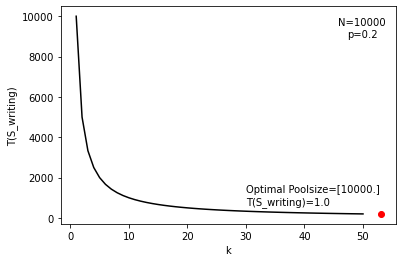

In [12]:
import math
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
N = 10000
percent = 20
prevalence = (percent * N) /100.0
p = prevalence/N

def expected_write_transactions(k):
    number_of_pools = N/k
    return number_of_pools

x = np.linspace(1,50,50).astype(float)
y = expected_write_transactions(x)

x_n = np.linspace(1,N,N).astype(float)
y_n = expected_write_transactions(x_n)

opt_idx_plot = np.where(y==np.amin(y))

fig = plt.figure()
new=fig.add_subplot(111)
new.plot(x,y,"black")
new.plot(x[opt_idx_plot]+3,y[opt_idx_plot],"ro")
new.text(x[opt_idx_plot]-20,y[opt_idx_plot]+500,"Optimal Poolsize={}\nT(S_writing)={}".format(x_n[np.where(y_n==np.amin(y_n))],np.amin(y_n)))
new.text(0.9,0.9,"N={}\np={}".format(N,p),ha='center', va='center', transform=new.transAxes)
plt.xlabel("k")
plt.ylabel("T(S_writing)")

optimal poolsize=[1.]
[2000.]


Text(0, 0.5, 'T(S_scrubbing)')

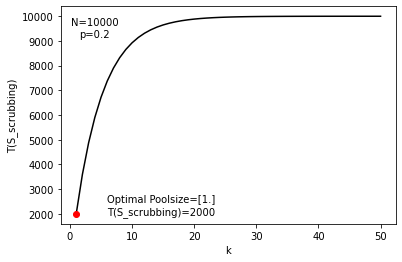

In [13]:
def expected_scrubbing(k):
    number_of_pools = N/k
    number_of_positive_pools = (1 - np.power((1-p),k))* number_of_pools
    return number_of_positive_pools*k

x = np.linspace(1,50,50).astype(float)
y = expected_scrubbing(x)

x_n = np.linspace(1,N,N).astype(float)
y_n = expected_scrubbing(x_n)

opt_idx = np.where(y==np.amin(y))
print("optimal poolsize={}".format(x[opt_idx]))
opt_k = y[opt_idx]
print(opt_k)
fig = plt.figure()
new=fig.add_subplot(111)
new.plot(x,y,"black")
new.plot(x_n[opt_idx],y_n[opt_idx],"ro")
new.text(x_n[opt_idx]+5,y_n[opt_idx]+3,"Optimal Poolsize={}\nT(S_scrubbing)={}".format(x[opt_idx],math.ceil(np.amin(y_n))))
new.text(0.1,0.9,"N={}\np={}".format(N,p),ha='center', va='center', transform=new.transAxes)
plt.xlabel("k")
plt.ylabel("T(S_scrubbing)")

optimal poolsize=[3.]
[8213.33333333]


Text(0, 0.5, 'T(S)')

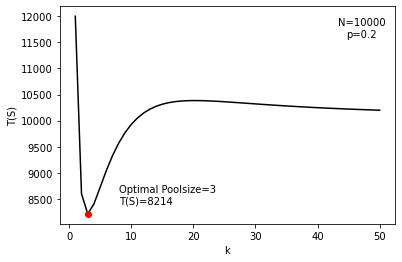

In [14]:
def expected_operations(k):
    number_of_pools = N/k
    number_of_positive_pools = (1 - np.power((1-p),k)) * number_of_pools
    return number_of_pools + number_of_positive_pools*k

x = np.linspace(1,50,50).astype(float)
y = expected_operations(x)

x_n = np.linspace(1,N,N).astype(float)
y_n = expected_operations(x_n)

opt_idx = np.where(y_n==np.amin(y_n))
print("optimal poolsize={}".format(x_n[opt_idx]))
opt_k = y_n[opt_idx]
print(opt_k)
fig = plt.figure()
new=fig.add_subplot(111)
new.plot(x,y,"black")
new.plot(x_n[opt_idx],y_n[opt_idx],"ro")
new.text(x_n[opt_idx]+5,y_n[opt_idx]+200,"Optimal Poolsize={}\nT(S)={}".format(int(x_n[np.where(y_n==np.amin(y_n))]),math.ceil(np.amin(y_n))))
new.text(0.9,0.9,"N={}\np={}".format(N,p),ha='center', va='center', transform=new.transAxes)
plt.xlabel("k")
plt.ylabel("T(S)")

[]

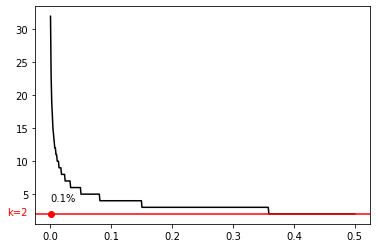

In [15]:

x = np.linspace(1,500,500)
y = np.ceil(1.24 * np.power(x/1000,-0.466))
plt.plot(x/1000,y,color="black")
plt.plot(x[np.argmax(y<2.00)]/1000,2.00,"ro")
plt.text(x[np.argmax(y<2.00)]/1000,4.00,"{}%".format(x[np.argmax(y<2.00)]/1000*100))
plt.text(-0.07,1.8,"k=2",color="r")
plt.axhline(y=2,color="r")
plt.plot()

In [27]:
def expected_operations(N,k,p):
    number_of_pools = N/k
    number_of_positive_pools = (1 - np.power((1-p),k)) * number_of_pools
    return number_of_pools + number_of_positive_pools*k

def expected_write_transactions(N,k):
    number_of_pools = N/k
    return number_of_pools

def optimal_pool_size(N,p):
    if(p<=0.0):
        return N
    return np.ceil(1.24*np.power(p,-0.466))

df = pd.DataFrame({"N":10000,"p":np.linspace(0.01,0.4,10)})
df["k"] = df.apply(lambda row: optimal_pool_size(row.N,row.p),axis=1)
df["T(S_h)"] = df.apply(lambda row: expected_operations(row.N,1,row.p),axis=1)
df["T(S_i)"] = df.apply(lambda row: expected_operations(row.N,row.k,row.p),axis=1)
df["TC(S_h)"] = df.apply(lambda row: expected_write_transactions(row.N,row.k),axis=1)
df["TC(S_i)"] = df.apply(lambda row: expected_write_transactions(row.N,1),axis=1)
df["E(S_h)"] = df.apply(lambda row: row["T(S_i)"]/row["T(S_h)"],axis=1)
df["C(S_h)"] = df.apply(lambda row: row["TC(S_i)"]/row["TC(S_h)"],axis=1)


In [28]:
df[:10]

,N,p,k,T(S_h),T(S_i),TC(S_h),TC(S_i),E(S_h),C(S_h)
0,10000,0.010000,11.0,10100.000000,1955.708367,909.090909,10000.0,0.193634,11.0
1,10000,0.053333,5.0,10533.333333,4396.992365,2000.000000,10000.0,0.417436,5.0
2,10000,0.096667,4.0,10966.666667,5841.258665,2500.000000,10000.0,0.532638,4.0
3,10000,0.140000,4.0,11400.000000,7029.918400,2500.000000,10000.0,0.616660,4.0
4,10000,0.183333,3.0,11833.333333,7886.620370,3333.333333,10000.0,0.666475,3.0
5,10000,0.226667,3.0,12266.666667,8708.456296,3333.333333,10000.0,0.709929,3.0
6,10000,0.270000,3.0,12700.000000,9443.163333,3333.333333,10000.0,0.743556,3.0
7,10000,0.313333,3.0,13133.333333,10095.623704,3333.333333,10000.0,0.768702,3.0
8,10000,0.356667,3.0,13566.666667,10670.719630,3333.333333,10000.0,0.786540,3.0
9,10000,0.400000,2.0,14000.000000,11400.000000,5000.000000,10000.0,0.814286,2.0


3